C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy: 0.8933333333333333
Confusion Matrix:
[[50  0  0]
 [ 0 48 14]
 [ 0  2 36]]


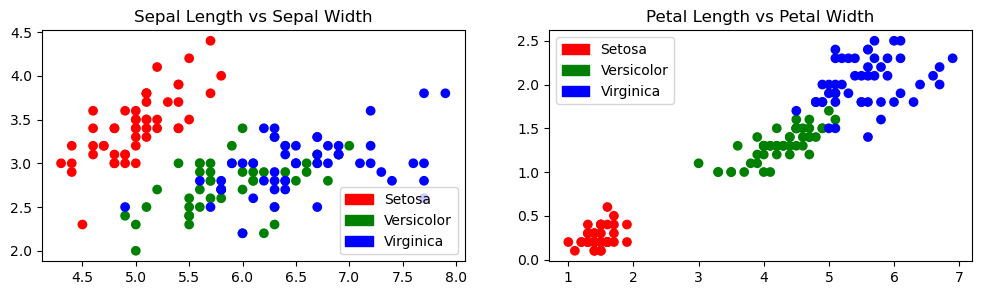

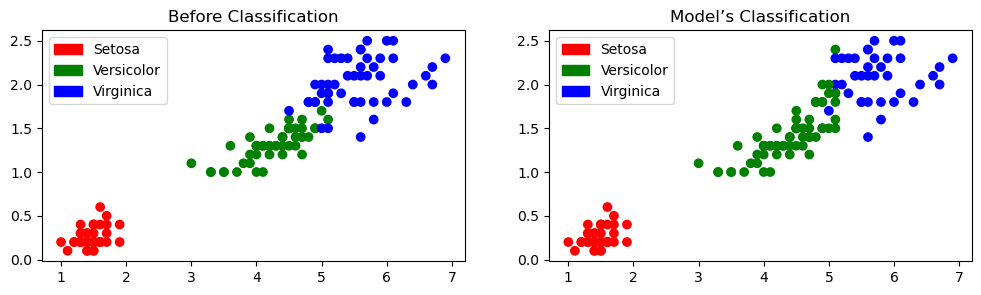

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

# Load the iris dataset
iris = datasets.load_iris()

# Convert iris data into Pandas DataFrames
x = pd.DataFrame(iris.data, columns=['SL', 'SW', 'PL', 'PW'])
y = pd.DataFrame(iris.target, columns=['Target'])

# Visualize the data using scatter plots
plt.figure(figsize=(12, 3))
colors = np.array(['red', 'green', 'blue'])
iris_target_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1, 2, 1)
plt.scatter(x['SL'], x['SW'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['PL'], x['PW'], c=colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Create a KMeans model to cluster the data
iris_kmeans_model = KMeans(n_clusters=3)
iris_kmeans_model.fit(x)

# Visualize the data before and after classification
plt.figure(figsize=(12, 3))
predicted_y = np.choose(iris_kmeans_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['PL'], x['PW'], c=colors[y['Target']])
plt.title('Before Classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['PL'], x['PW'], c=colors[predicted_y])
plt.title("Model’s Classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Evaluate the accuracy of the trained model
accuracy = sm.accuracy_score(predicted_y, y['Target'])
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion_matrix = sm.confusion_matrix(predicted_y, y['Target'])
print("Confusion Matrix:")
print(confusion_matrix)
